In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from joblib import dump, load

In [95]:
#_y = np.load("ditches_zone3.npy")
#y = _y.reshape(-1)

ditches_1 = np.load("../feature_extracted/3_zones_features/zone1/Ditches_width3_zone1.npy")
ditches_2 = np.load("../feature_extracted/3_zones_features/zone2/Ditches_width3_zone2.npy")
ditches_3 = np.load("../feature_extracted/3_zones_features/zone3/Ditches_width3_zone3.npy")

hpmf_f_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_mean3_zone1.npy")
hpmf_f_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_mean3_zone2.npy")
hpmf_f_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_mean3_zone3.npy")
hpmf_1 = np.load("../feature_extracted/3_zones_features/zone1/HPMF_zone1_raw.npy")
hpmf_2 = np.load("../feature_extracted/3_zones_features/zone2/HPMF_zone2_raw.npy")
hpmf_3 = np.load("../feature_extracted/3_zones_features/zone3/HPMF_zone3_raw.npy")

impoundment_f_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_mean3_zone1.npy")
impoundment_f_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_mean3_zone2.npy")
impoundment_f_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_mean3_zone3.npy")
impoundment_1 = np.load("../feature_extracted/3_zones_features/zone1/Impoundment_zone1_raw.npy")
impoundment_2 = np.load("../feature_extracted/3_zones_features/zone2/Impoundment_zone2_raw.npy")
impoundment_3 = np.load("../feature_extracted/3_zones_features/zone3/Impoundment_zone3_raw.npy")

slope_f_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_mean3_zone1.npy")
slope_f_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_mean3_zone2.npy")
slope_f_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_mean3_zone3.npy")
slope_1 = np.load("../feature_extracted/3_zones_features/zone1/Slope_zone1_raw.npy")
slope_2 = np.load("../feature_extracted/3_zones_features/zone2/Slope_zone2_raw.npy")
slope_3 = np.load("../feature_extracted/3_zones_features/zone3/Slope_zone3_raw.npy")

skyview_f_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_cone_5_0975_mean4_opening4_zone1.npy")
skyview_f_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_cone_5_0975_mean4_opening4_zone2.npy")
skyview_f_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_cone_5_0975_mean4_opening4_zone3.npy")
skyview_1 = np.load("../feature_extracted/3_zones_features/zone1/Skyview_zone1_raw.npy")
skyview_2 = np.load("../feature_extracted/3_zones_features/zone2/Skyview_zone2_raw.npy")
skyview_3 = np.load("../feature_extracted/3_zones_features/zone3/Skyview_zone3_raw.npy")



In [96]:
training_ditches = np.concatenate((ditches_1, ditches_3), axis = 0)
amountOfDitches = 0
for row in training_ditches:
    for pixel in row:
        if pixel == 1:
            amountOfDitches +=1
print(amountOfDitches)

319286


In [99]:
def createBalancedMask(ditchArr):
    newArr = ditchArr.copy()
    print("in function")
    for i in range(0, len(ditchArr), 30):
        for j in range(0, len(ditchArr[i]), 75):
            zoneContainsDitches = None
            for k in range(30):
                for l in range(75):
                    if ditchArr[i+k][j+l] == 1:
                        zoneContainsDitches = True
                        for m in range(30):
                            for n in range(75):
                                newArr[i+m][j+n] = 1
                    if zoneContainsDitches == True:
                        break
                if zoneContainsDitches == True:
                    break
            if zoneContainsDitches == None:
                for m in range(30):
                    for n in range(75):
                        newArr[i+m][j+n] = 0
    return newArr
                    

In [100]:
balancedMaskZone1 = createBalancedMask(ditches_1)
balancedMaskZone3 = createBalancedMask(ditches_3)

print(balancedMaskZone1.shape)
balancedMaskZone1 = balancedMaskZone1.reshape(2625*3000)
print(balancedMaskZone1.shape)
balancedMaskZone3 = balancedMaskZone3.reshape(2625*3000)

'''
plt.figure(num=None, figsize=(28,36), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,2,i+1) for i in range(4)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Balanced mask zone1")
ax[0].imshow(balancedMaskZone1)
ax[1].title.set_text("Ditches zone1")
ax[1].imshow(ditches_1)
ax[2].title.set_text("Balanced mask zone3")
ax[2].imshow(balancedMaskZone3)
ax[3].title.set_text("Ditches zone3")
ax[3].imshow(ditches_3)
'''

in function
in function
(3000, 2625)
(7875000,)


'\nplt.figure(num=None, figsize=(28,36), facecolor=\'w\', edgecolor=\'k\')\nax = [plt.subplot(2,2,i+1) for i in range(4)]\nfor a in ax:\n    a.set_xticklabels([])\n    a.set_yticklabels([])\n    a.tick_params(bottom=False, left=False)\nplt.subplots_adjust(wspace=0,hspace=0)\n\nax[0].title.set_text("Balanced mask zone1")\nax[0].imshow(balancedMaskZone1)\nax[1].title.set_text("Ditches zone1")\nax[1].imshow(ditches_1)\nax[2].title.set_text("Balanced mask zone3")\nax[2].imshow(balancedMaskZone3)\nax[3].title.set_text("Ditches zone3")\nax[3].imshow(ditches_3)\n'

In [101]:
_X1 = np.dstack([hpmf_f_1,impoundment_f_1,skyview_f_1,slope_f_1,hpmf_1,impoundment_1,skyview_1,slope_1])
_X1 = _X1.reshape(2625*3000, 8)

X_test = np.dstack([hpmf_f_2,impoundment_f_2,skyview_f_2,slope_f_2,hpmf_2,impoundment_2,skyview_2,slope_2])
X_test = X_test.reshape(2625*3000, 8)

_X3 = np.dstack([hpmf_f_3,impoundment_f_3,skyview_f_3,slope_f_3,hpmf_3,impoundment_3,skyview_3,slope_3])
_X3 = _X3.reshape(2625*3000, 8)

print(_X2.shape)



_y1 = ditches_1
_y1 = _y1.reshape(2625*3000)

y_test = ditches_2
y_test = y_test.reshape(2625*3000)

_y3 = ditches_3
_y3 = _y3.reshape(2625*3000)



print(_y1.shape)

(7875000, 8)
(7875000,)


In [102]:
y_train1temp = [0]
X_train1temp = [np.zeros(8)]
for i in range(len(balancedMaskZone1)):
    if balancedMaskZone1[i] == True:
        y_train1temp.append(_y1[i])
        X_train1temp.append(_X1[i])
y_train1 = np.array(y_train1temp)
X_train1 = np.array(X_train1temp)
print(y_train1.shape)
print(X_train1.shape)

y_train3temp = [0]
X_train3temp = [np.zeros(8)]
for i in range(len(balancedMaskZone3)):
    if balancedMaskZone3[i] == True:
        y_train3temp.append(_y3[i])
        X_train3temp.append(_X3[i])
y_train3 = np.array(y_train3temp)
X_train3 = np.array(X_train3temp)
print(y_train3.shape)
print(X_train3.shape)
            

        


(549001,)
(549001, 8)
(2542501,)
(2542501, 8)


In [103]:
X_train = np.concatenate((X_train1, X_train3), axis = 0)
y_train = np.concatenate((y_train1, y_train3), axis = 0)

In [104]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(3091502,)
(3091502, 8)
(7875000,)
(7875000, 8)


In [105]:
def rasterToZones(arr, zoneSize):
    newArr = arr.copy()
    print(len(arr))
    print(len(arr[0]))
    for i in range(0, len(arr), zoneSize):
        for j in range(0, len(arr[i]), zoneSize):
            numberOfClassified = 0
            if i < len(arr) - zoneSize and j < len(arr[i]) - zoneSize:
                for k in range(zoneSize):
                    for l in range(zoneSize):
                        if arr[i + k][j + l] == 1:
                            numberOfClassified += 1
                if numberOfClassified > (zoneSize**2)/4:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 1
                else:
                    for k in range(zoneSize):
                        for l in range(zoneSize):
                            newArr[i + k][j + l] = 0
    return newArr

In [106]:
clf = RandomForestClassifier(n_estimators=120)

clf.fit(X_train,y_train)


dump(clf, "../classifiers/190304RF_Classifier_zone_2_3_balanced_3500smallZones_120trees.joblib")

['../classifiers/190304RF_Classifier_zone_2_3_balanced_3500smallZones_120trees.joblib']

['RF_Classifier_zone3.joblib']

In [108]:
#clfFile = load("RF_Classifier_zone3.joblib")

In [107]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

y_pred = clf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

7875000
0.9779231746031746
0.5342309592268426
[[7658968  137083]
 [  36772   42177]]


<BarContainer object of 8 artists>

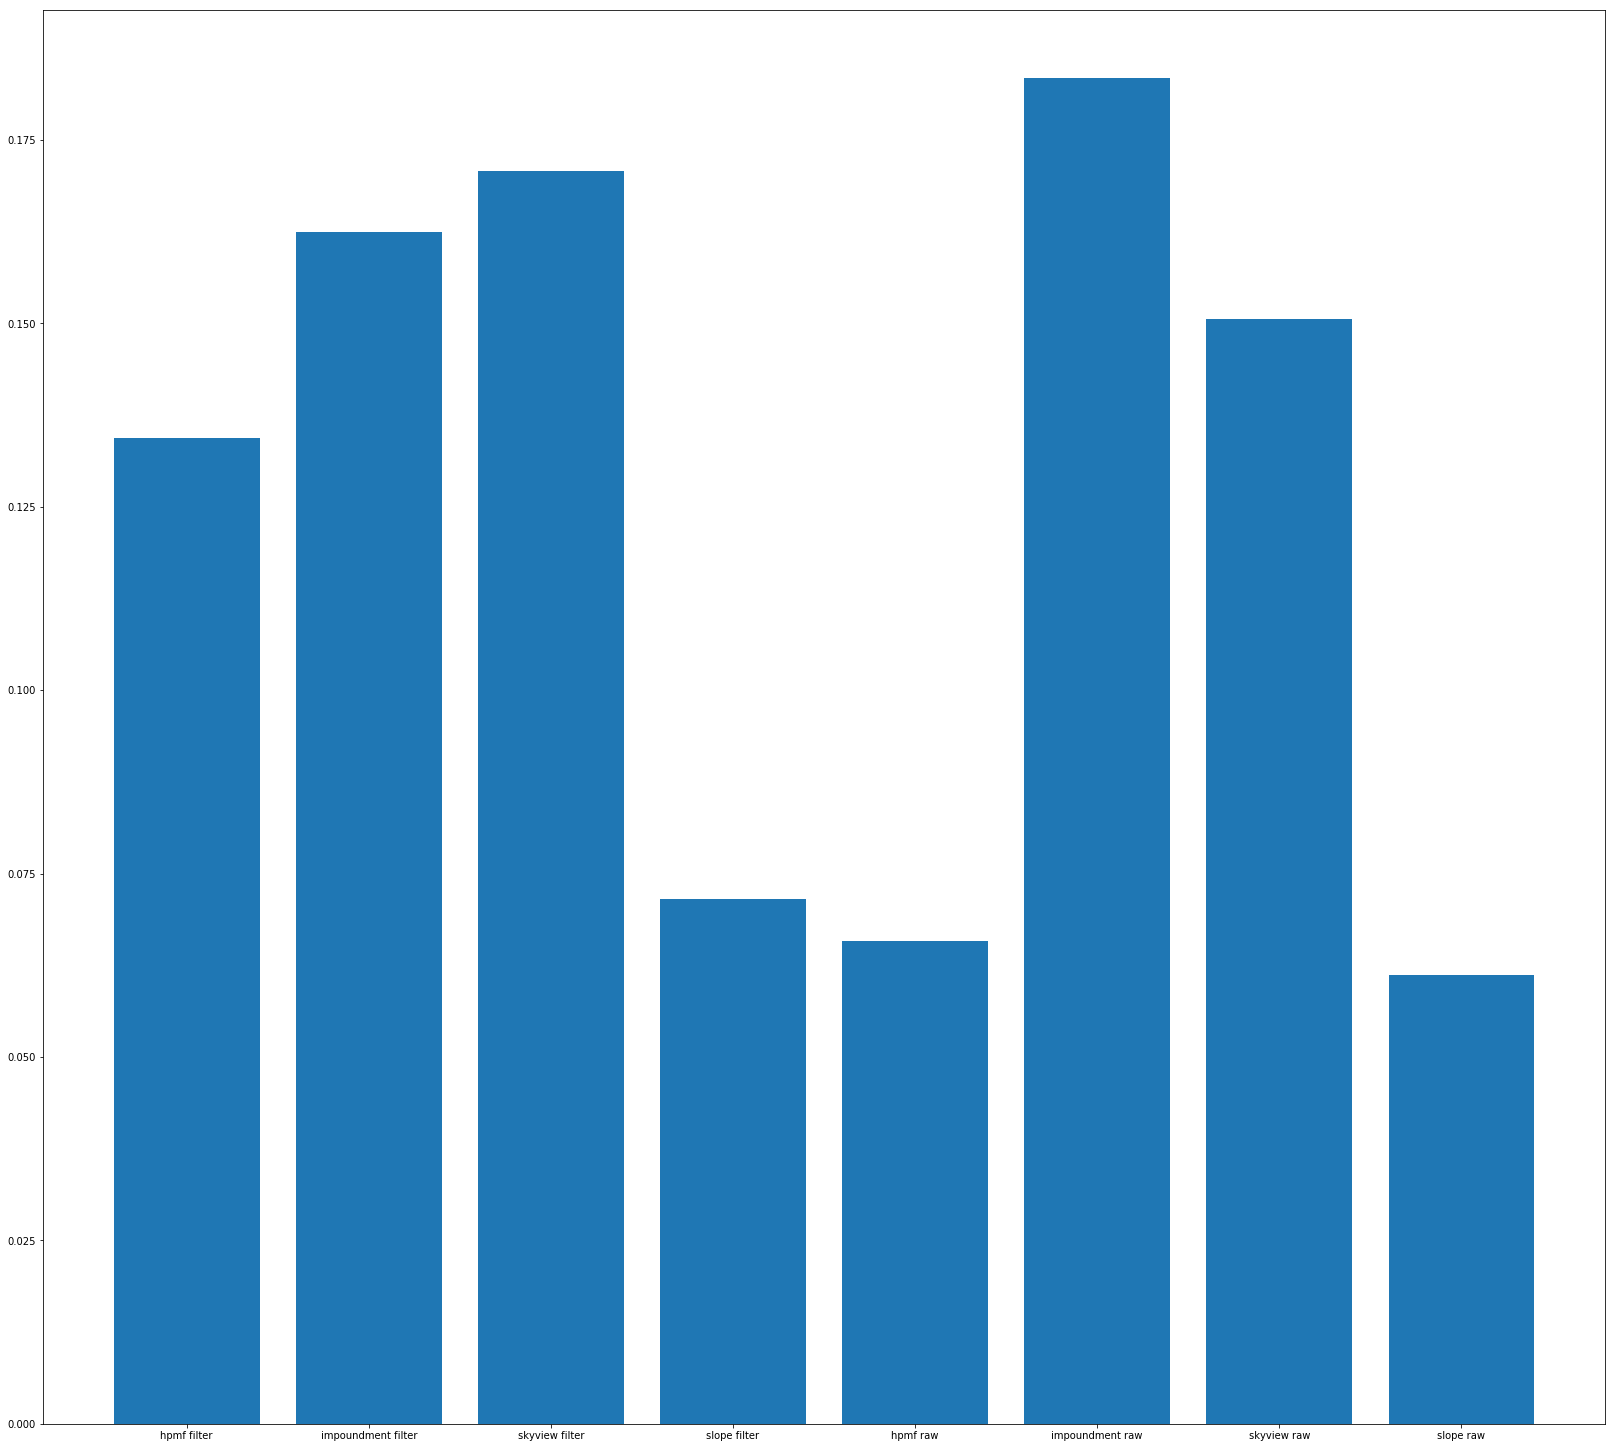

In [108]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.bar(["hpmf filter","impoundment filter","skyview filter","slope filter","hpmf raw","impoundment raw","skyview raw","slope raw"],clf.feature_importances_)

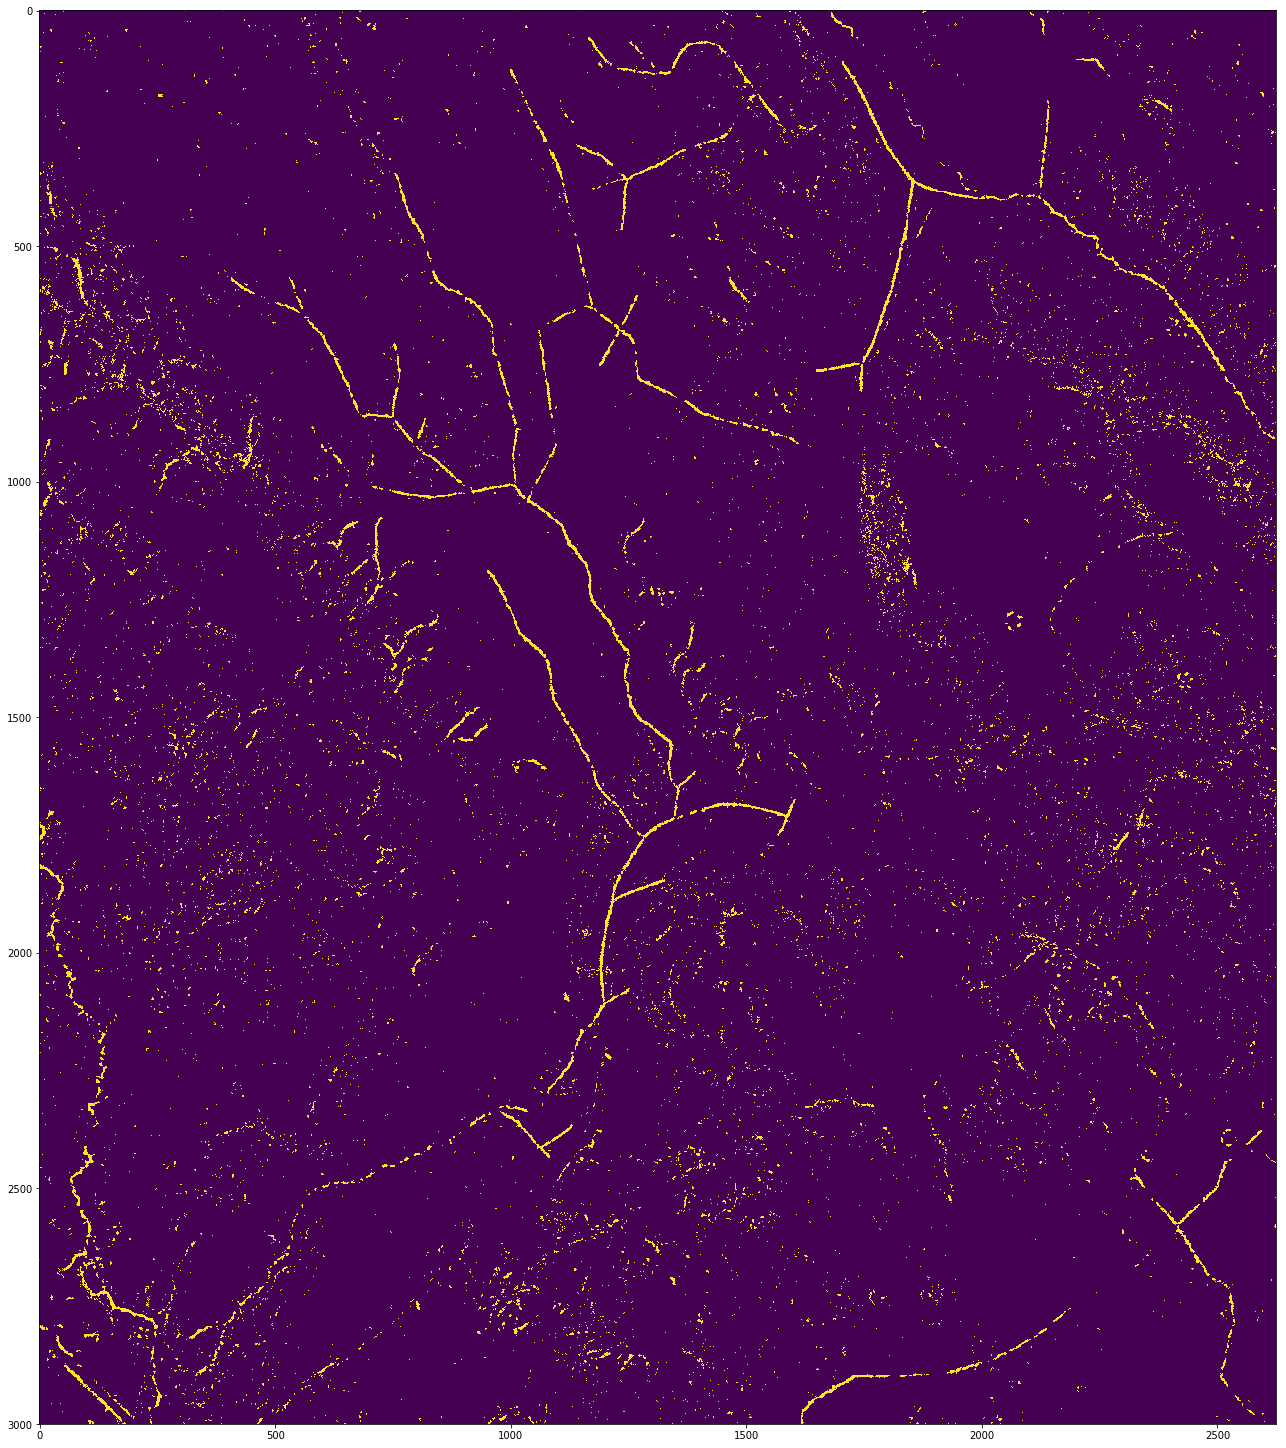

In [109]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
predictionArr = y_pred.reshape(3000, 2625)
plt.imshow(predictionArr)

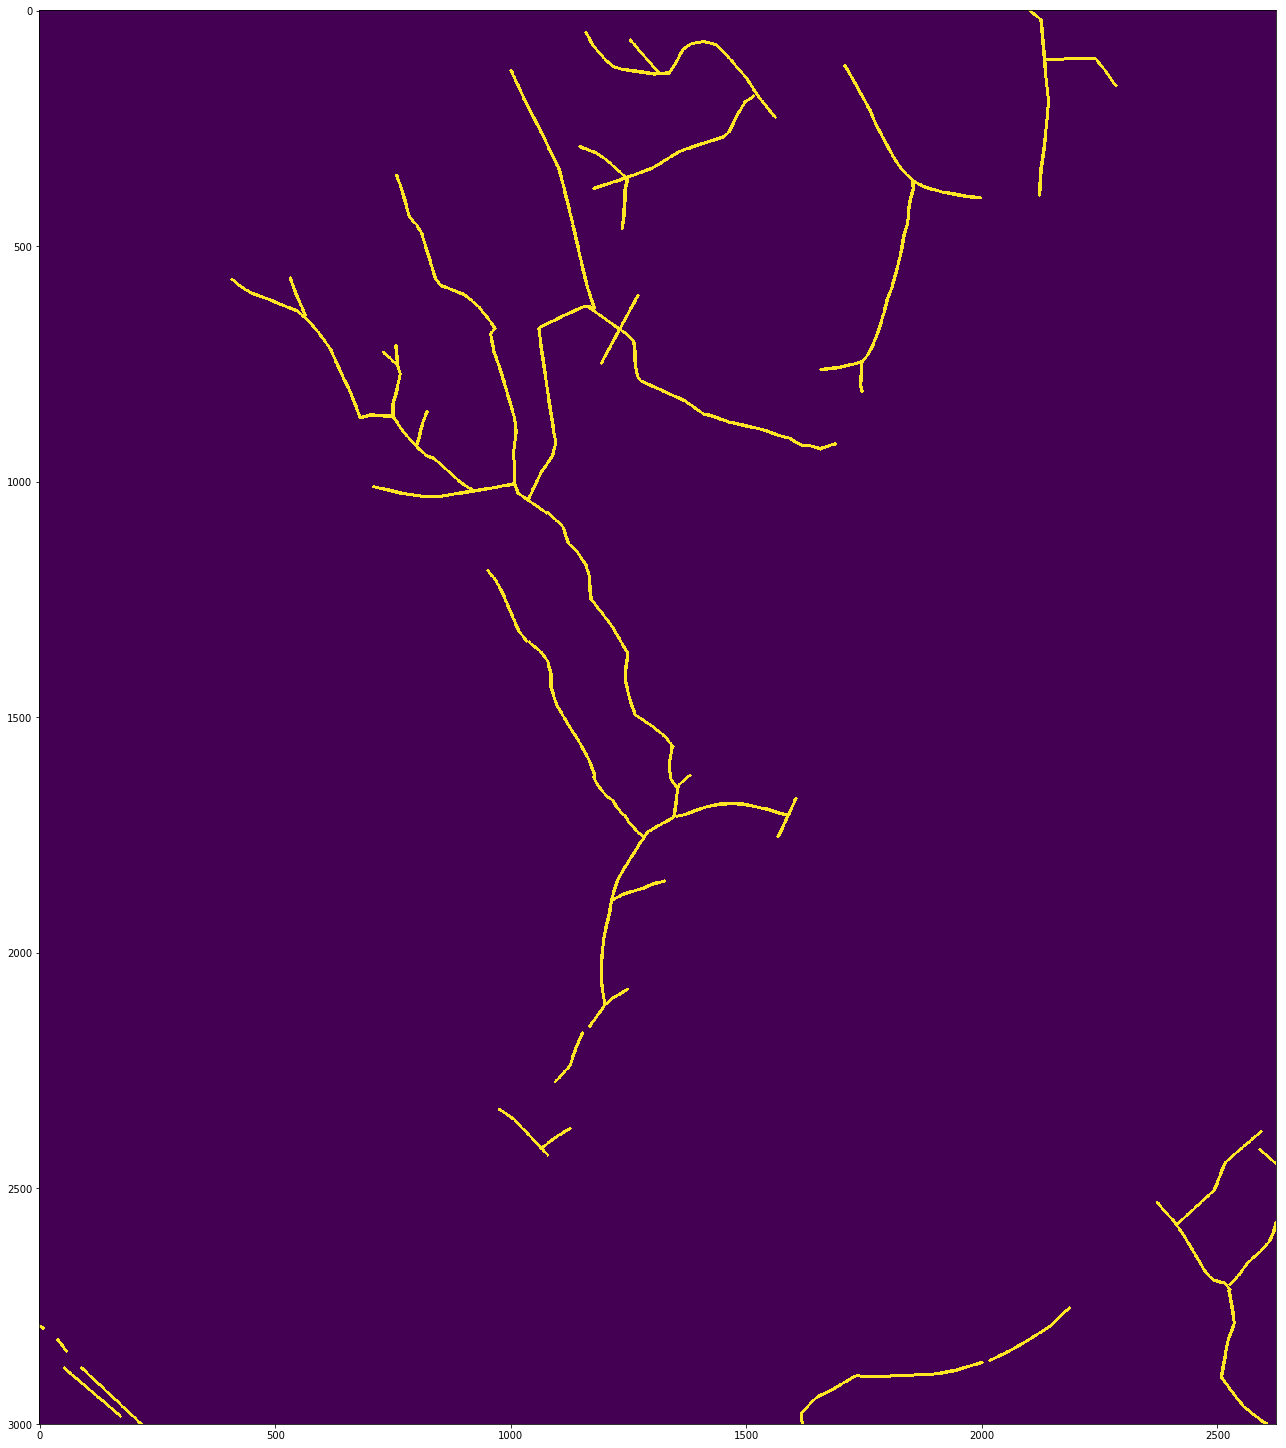

In [110]:
y_test_reshape = y_test.reshape(3000,2625)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_test_reshape)

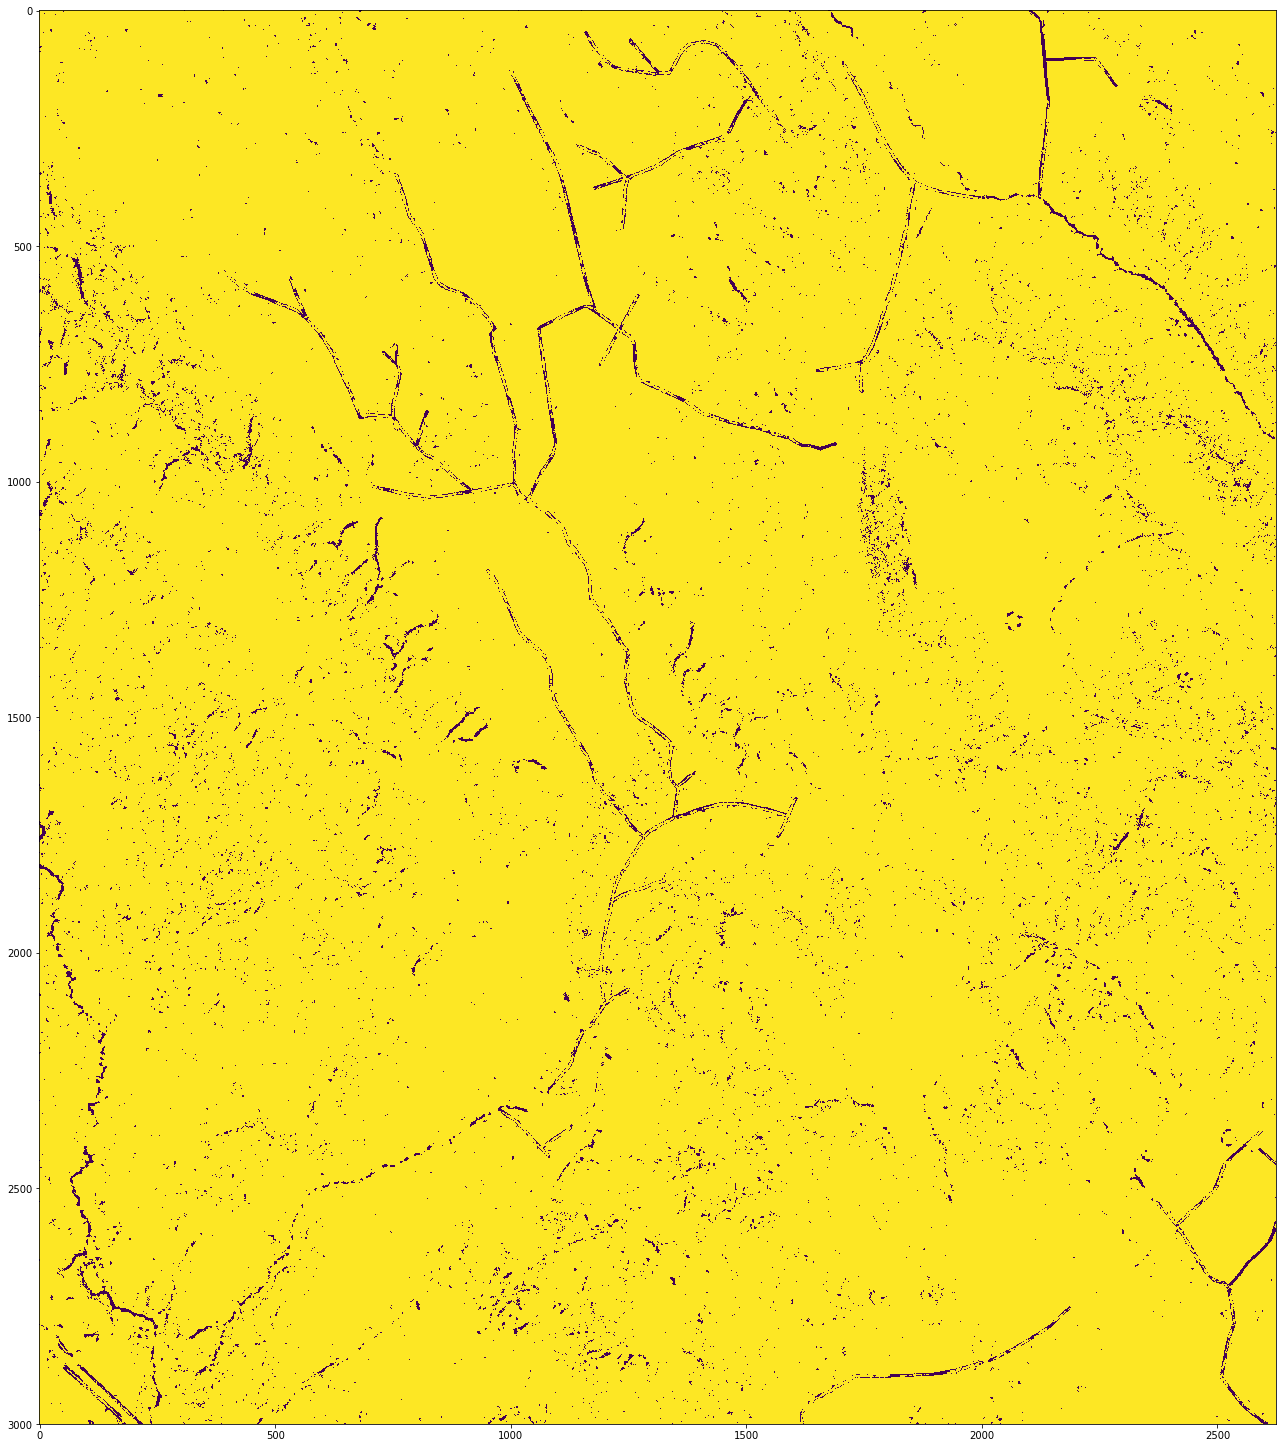

In [111]:
evaluatedArr = np.isclose(predictionArr, y_test_reshape)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(evaluatedArr)

3000
2625


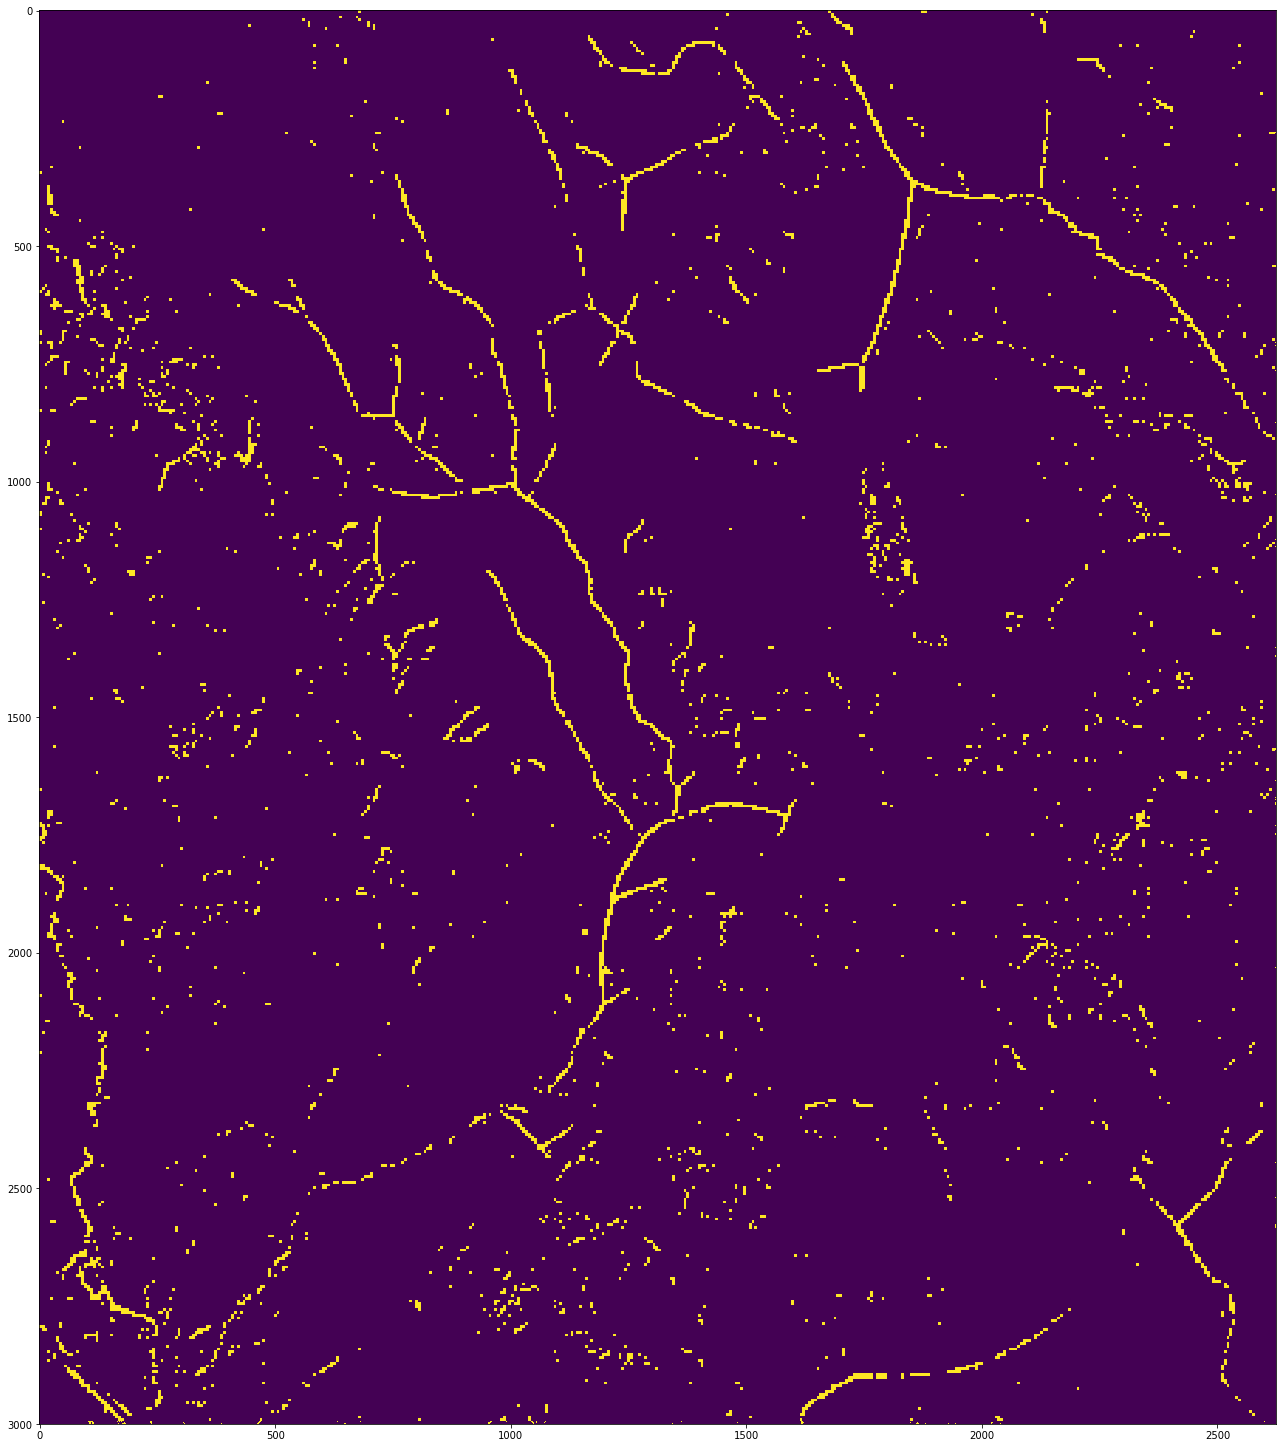

In [112]:
predictionZonesArr = rasterToZones(predictionArr, 6)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(predictionZonesArr)

3000
2625


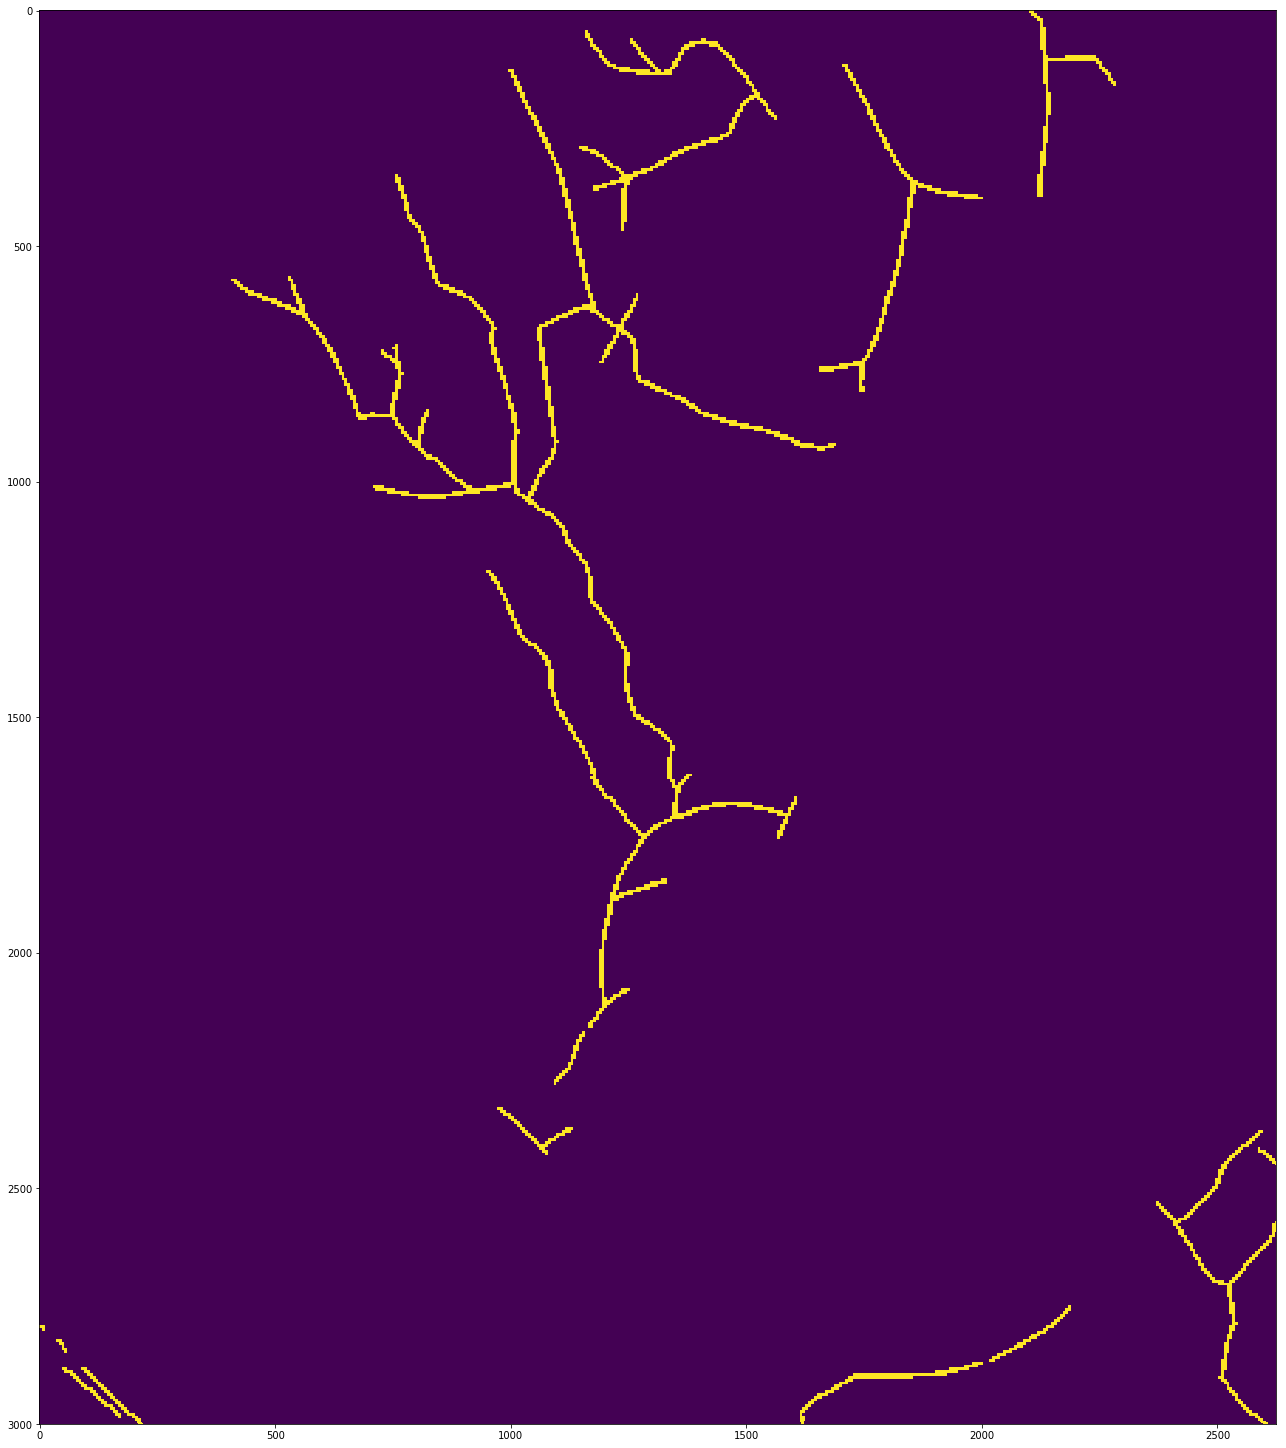

In [113]:
validationZones = rasterToZones(y_test_reshape, 6)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(validationZones)

In [114]:
evaluatedPoints = 0
evaluatedZeroPoints = 0
correctPredictions = 0
correctZeroPredictions = 0
for i in range(len(validationZones)):
    for j in range(len(validationZones[i])):
        if validationZones[i][j] == 1:
            evaluatedPoints += 1
            if predictionZonesArr[i][j] == 1:
                correctPredictions += 1
        else:
            evaluatedZeroPoints += 1
            if predictionZonesArr[i][j] == 0:
                correctZeroPredictions += 1
            
print(correctPredictions/evaluatedPoints)
print(correctZeroPredictions/evaluatedZeroPoints)

0.6147972783706368
0.9821345844220191
